<a href="https://colab.research.google.com/github/OleKrarup123/Agilent-86142B-driver-GPIB-python/blob/main/SurfacePlot/SurfacePlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import useful libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read datafile

In [ ]:
#Original data source: https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1310011401&request_locale=en

df_list=pd.read_html('https://github.com/OleKrarup123/PythonTutorials/blob/main/SurfacePlot/LifeExpectancyCanada.csv')
df=df_list[0]
df.head()


## Extract 'Years' as list of strings and list of floats

In [ ]:
#Get list of column names
columnNames=list(df.keys())
print(columnNames)
print(' ')

#Discard 'Index' and 'Age group' 
years_as_string=columnNames[2:]
print(years_as_string)
print(' ')

#Convert years as strings to years as float
years= np.array([float(x) for x in years_as_string])
print(years)




## Extract the age groups

In [ ]:
ages = np.array(df['Age group'])
print(ages)

## Plot initial and final Life Expectancies

In [ ]:

plt.figure()
plt.title("Initial and final LE")
plt.plot(ages,df['1981'],label='1981')
plt.plot(ages,df['2019'],label='2019')
plt.xlabel('Age [years]')
plt.ylabel('Life Expectancy [years]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()  

## Extract LE matrix

In [ ]:
print(years_as_string)
print(' ')

#Extract LE columns from dataframe
LE_dataframe=df[years_as_string]
print(LE_dataframe)

#Convert dataframe columns into numpy array
LE_array=np.array(df[years_as_string])
print(' ')
print(LE_array)




## Create 2D colour-surface plot of LE

In [ ]:

fig, ax = plt.subplots()
ax.set_title('Life Expectancy [1981-2019]')

#Create meshgrid of ages and years
x = ages
y = years
X, Y = np.meshgrid(x, y)

#Specify Z-data
Z=LE_array

print(np.shape(X))
print(np.shape(Y))
print(np.shape(Z))

surf=ax.contourf(X, Y, Z.T,levels=20) #Note: Transpose Z-data so its dimensions match X and Y
plt.xlabel('Age [years]')
plt.ylabel('Year')

#Set colorbar and label
cbar=fig.colorbar(surf, ax=ax) 
cbar.set_label('Life Expectancy [Years]')
plt.show()




## Create 3D colour-surface plot of LE

In [ ]:
from matplotlib import cm
# Different colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

#Plot LE evolution in 3D
fig, ax = plt.subplots(1,1, figsize=(10,7),subplot_kw={"projection": "3d"})
plt.title("LE Evolution")

x = ages
y = years
X, Y = np.meshgrid(x, y)
Z=LE_array
# Plot the surface.


surf = ax.plot_surface(X, Y, Z.T, cmap=cm.viridis,linewidth=0, antialiased=False)
plt.xlabel('Age [years]')
plt.ylabel('Year')

# Add a color bar which maps values to colors.
cbar=fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('Life Expectancy [Years]')
plt.show()

...\
...\
...\
...\
...\
...


## Make GIF of life expectancy

In [ ]:
#Import matplotlib animation tools
from matplotlib.animation import FuncAnimation, PillowWriter

# Source of inspiration: 
# https://www.c-sharpcorner.com/article/create-animated-gif-using-python-matplotlib/

In [ ]:
#Specify years of interest
year0='1981'
year1='1991'
year2='2001'
year3='2011'
year4='2019'

#Initialize plot
fig, ax = plt.subplots()  
x, y0,y1,y2,y3,y4 = [], [] , [] , [] , [] , [] #Empty lists of ploting values
points0, = plt.plot([], [], '.',label = year0) #Empty lists of points
points1, = plt.plot([], [], '.',label = year1) 
points2, = plt.plot([], [], '.',label = year2) 
points3, = plt.plot([], [], '.',label = year3) 
points4, = plt.plot([], [], '.',label = year4) 


#Function for initializing axes
def init():  
    ax.set_xlim(0, np.max(ages))  
    ax.set_ylim(-1, 100)  


#Function for updating the points
def update(t):  

    x.append(t)   
    y0.append(df[year0][t])  
    y1.append(df[year1][t])  
    y2.append(df[year2][t])  
    y3.append(df[year3][t])  
    y4.append(df[year4][t])  
    
    points0.set_data(x, y0) #Set new points
    points1.set_data(x, y1)
    points2.set_data(x, y2)
    points3.set_data(x, y3)
    points4.set_data(x, y4)
      
#Axes and legend
plt.title('Life Expectancy in Canada')
plt.xlabel('Age [years]')
plt.ylabel('Life Expectancy [years]')
plt.legend()  

#Do animation
ani = FuncAnimation(fig, update, ages, init_func=init)
plt.show()

#Save animation as .gif
writer = PillowWriter(fps=15)  
ani.save("Life_Expectancy.gif", writer=writer)  

...\
...\
...\
...\
...\
...


## Computing yearly survival probability

Link to discussion on [Cross Validated](https://stats.stackexchange.com/questions/597138/calculating-probability-of-survival-from-life-expectancy-table)

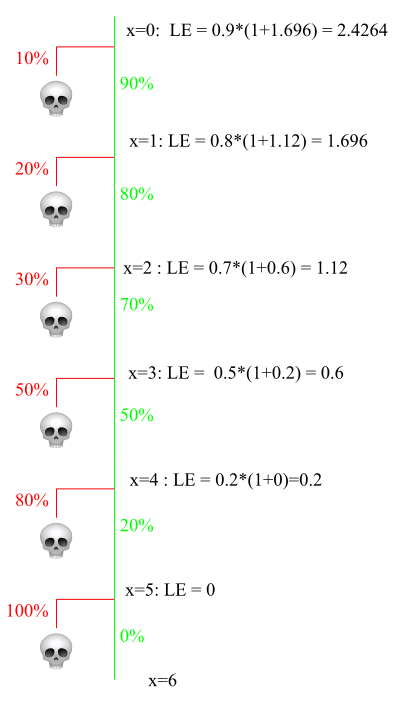

Let the life expectancy for someone, who is $x$ years old, be $e_x$. We want to use a table of $e_x$ to determine the probability, $p_{(x\rightarrow x+1)}$, of surviving from year x to year x+1. To figure out how to do this, consider the diagram above ^^^

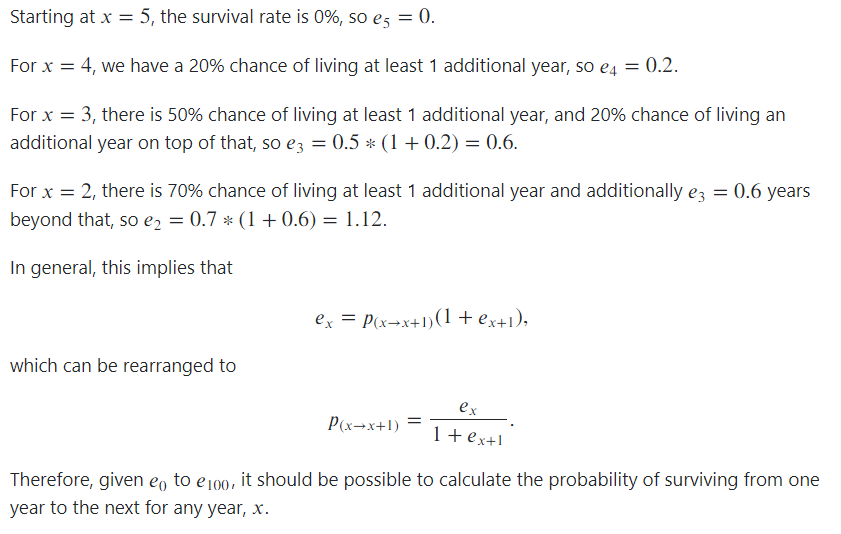

In [ ]:
#LE(x) array
LE_dataframe.head()

In [ ]:
#LE(x+1) array
LE_dataframe_shifted_by_one=LE_dataframe.shift(-1)
LE_dataframe_shifted_by_one.head()

In [ ]:
#Calculate survival probability
p_survival=LE_dataframe/(1+LE_dataframe_shifted_by_one) #Compute survival prob.
p_survival=p_survival.fillna(0) #Replace NaN values at final age by zeros

#Calculate death probability
p_death = 1 - p_survival

In [ ]:
plt.figure()
plt.plot(ages,p_death['2017'],label='Death Rate')
plt.plot(ages,p_survival['2017'],label='Survival Rate')
plt.legend()
plt.show()

plt.figure()
plt.title("Death rate on log scale")
plt.plot(ages,p_death['2017'])
plt.yscale('log')
plt.show()



In [ ]:
fig, ax = plt.subplots()
ax.set_title('Death rate [1981-2019]')

#Create meshgrid of ages and years
x = ages
y = years
X, Y = np.meshgrid(x, y)

#Specify Z-data
Z=np.log10(1-p_survival)


surf=ax.contourf(X, Y, Z.T,levels=40) #Note: Transpose Z-data so its dimensions match X and Y
plt.xlabel('Age [years]')
plt.ylabel('Year')

#Set colorbar and label
cbar=fig.colorbar(surf, ax=ax) 
cbar.set_label('Death rate [log10(prob)]')
plt.show()